# P13-1 실습 과제
##Mini-batch size & Learning Rate 튜닝

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/150
8/8 - 1s - loss: 3.8247 - accuracy: 0.3760 - val_loss: 1.9813 - val_accuracy: 0.5740
Epoch 2/150
8/8 - 0s - loss: 2.1271 - accuracy: 0.5420 - val_loss: 1.7638 - val_accuracy: 0.6320
Epoch 3/150
8/8 - 0s - loss: 1.5061 - accuracy: 0.6040 - val_loss: 1.1867 - val_accuracy: 0.6680
Epoch 4/150
8/8 - 0s - loss: 1.5094 - accuracy: 0.6040 - val_loss: 1.1255 - val_accuracy: 0.6760
Epoch 5/150
8/8 - 0s - loss: 1.2290 - accuracy: 0.6200 - val_loss: 0.9157 - val_accuracy: 0.6580
Epoch 6/150
8/8 - 0s - loss: 0.8405 - accuracy: 0.6780 - val_loss: 0.6441 - val_accuracy: 0.7360
Epoch 7/150
8/8 - 0s - loss: 0.9185 - accuracy: 0.6540 - val_loss: 0.8360 - val_accuracy: 0.7040
Epoch 8/150
8/8 - 0s - loss: 0.9467 - accuracy: 0.6360 - val_loss: 0.7934 - val_accuracy: 0.6980
Epoch 9/150
8/8 - 0s - loss: 0.8930 - accuracy: 0.6640 - val_loss: 0.6561 - val_accuracy: 0.7420
Epoch 10/150
8/8 - 0s - loss: 0.9461 - accuracy: 0.6520 - val_loss: 0.5759 - val_accuracy: 0.7760
Epoch 11/150
8/8 - 0s - loss:

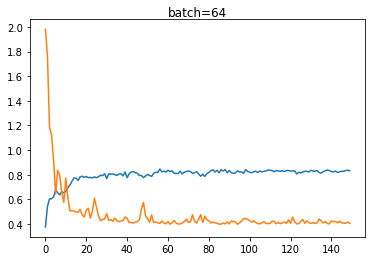

In [12]:
# mlp for the blobs problem with minibatch gradient descent with varied batch size
# 아래의 코드에서 다음 두 개의 파라미터를 조합하여 최고의 모델링 성능을 내고 그 결과를 print()로 출력하십시오.
# 튜닝할 파라미터 : batch_size & lr (각각 3가지의 옵션이 있으므로 두 파라미터를 조합할 수 있는 경우의 수는 모두 9가지)
# 모델의 성능 평가 기준은 다음의 우선순위에 따라 결정하시오. 
# 1. Validation Loss가 최소, 2. Accuracy는 최고값에 가까울 것
# 9번의 실험 후 최적이라고 생각되는 파라미터 값을 코드에 지정하고 셀을 다시 run하여 최종 결과를 출력하시오.
from sklearn.datasets import make_blobs
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from matplotlib import pyplot

# prepare train and test dataset
def prepare_data():
	# generate 2d classification dataset
	X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
	# one hot encode output variable
	y = to_categorical(y)
	# split into train and test
	n_train = 500
	trainX, testX = X[:n_train, :], X[n_train:, :]
	trainy, testy = y[:n_train], y[n_train:]
	return trainX, trainy, testX, testy

# fit a model and plot learning curve
def fit_model(trainX, trainy, testX, testy, n_batch):
	
  # define model
	model = Sequential()
	model.add(Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(3, activation='softmax'))
	
  # lr의 값을  0.1, 0.01, 0.001 중에서 선택하여 이곳에 지정
	opt = SGD(lr=0.01, momentum=0.9) 
	model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
	# fit model
	history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=150, verbose=2, batch_size=n_batch)
	print('accuracy = ', format(history.history['accuracy'][149],".3f"), ' ', 'validation loss = ', format(history.history['val_loss'][149],".3f"))
  # plot learning curves
	pyplot.plot(history.history['accuracy'], label='train')
	pyplot.plot(history.history['val_loss'], label='test')
	pyplot.title('batch='+str(n_batch), pad=-40)



# prepare dataset
trainX, trainy, testX, testy = prepare_data()

# batch_size의 값을   16, 32, 64 중에서 선택하여 이곳에 지정
batch_size = 64

fit_model(trainX, trainy, testX, testy, batch_size)
# show learning curves
pyplot.show()

# 결과를 메모장에 적어놓고 lr과 batch_size를 바꿔가며 최적의 파라미터를 찾아가시오.
# 최적의 lr과 batch_size를 선택하여 위의 코드에 적고 Run한 결과룰 출력하여 제출하시오. 